# Excersie 1
1. Open the file './befkbhalderstatkode.csv'
2. Turn the csv file into a numpy ndarray with np.genfromtxt(filename, delimiter=',', dtype=np.uint, skip_header=1)

In [18]:
import numpy as np
import matplotlib.pyplot as plt

numpy_arr = np.genfromtxt('befkbhalderstatkode.csv', delimiter=',', dtype=np.uint, skip_header=1)

3. Find out how many people lived in each of the 11 areas in 2015

In [57]:
neighb = {1: 'Indre By', 2: 'Østerbro', 3: 'Nørrebro', 4: 'Vesterbro/\nKgs. Enghave', 
       5: 'Valby', 6: 'Vanløse', 7: 'Brønshøj-Husum', 8: 'Bispebjerg', 9: 'Amager Øst', 
       10: 'Amager Vest', 99: 'Udenfor'}


lived = {val[1]: lived.get(val[1], 0) + val[4] if val[0] == 2015 else lived.get(val[1], 0) for val in numpy_arr}
print(lived)

{1: 51937.0, 2: 75113.0, 3: 78802.0, 4: 61623.0, 5: 51727.0, 6: 39537.0, 7: 43908.0, 8: 53604.0, 9: 55205.0, 10: 64967.0, 99: 3872.0}


4. Make a bar plot to show the size of each city area from the smallest to the largest

Text(0.5, 1.0, 'People in Cities')

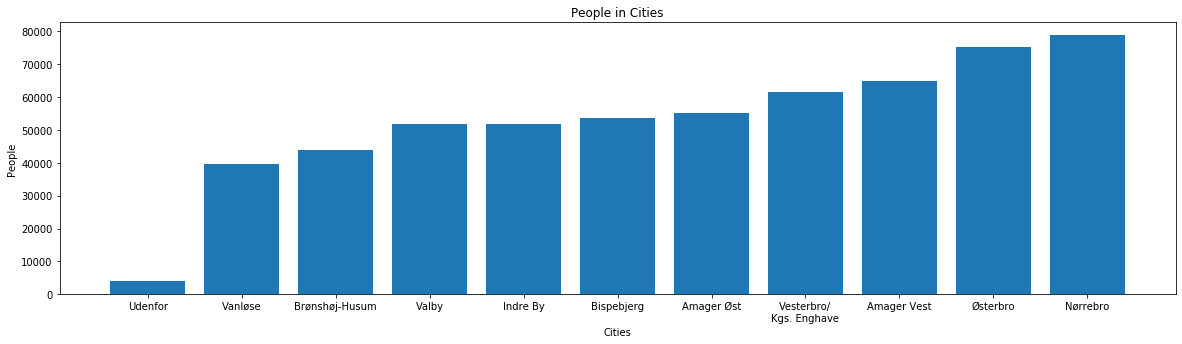

In [67]:
lived = {k: v for k, v in sorted(lived.items(), key=lambda item: item[1])}

y_bar = [neighb[l] for l in lived]
x_bar = lived.values()

plt.figure(figsize=(20, 5))
plt.bar(y_bar, x_bar)
plt.ylabel('People')
plt.xlabel('Cities')
plt.title('People in Cities')

5. Create a boolean mask to find out how many people above 65 years lived in Copenhagen in 2015
6. How many of those were from the other nordic countries (not dk)

In [76]:
maskdk = (numpy_arr[:,0] == 2015) & (numpy_arr[:,2] >= 65) & (numpy_arr[:,1] != 99)
maskother = (numpy_arr[:,0] == 2015) & (numpy_arr[:,2] >= 65) & (numpy_arr[:,1] == 99)

print('65 years or older in CPH, 2015: {}'.format(np.sum(numpy_arr[maskdk][:,4])))
print('65 years or older in other, 2015: {}'.format(np.sum(numpy_arr[maskother][:,4])))

65 years or older in CPH, 2015: 59799
65 years or older in other, 2015: 60


7. Make a line plot showing the changes of number of people in vesterbro and østerbro from 1992 to 2015

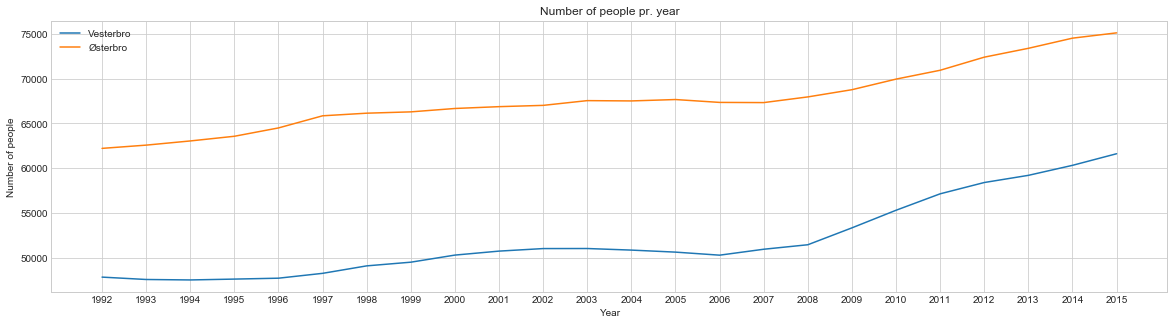

In [131]:
def number_of_people_per_year(n, mask):
    all_people_in_given_n = numpy_arr[mask & (numpy_arr[:,0] == n)]
    sum_of_people = all_people_in_given_n[:,4].sum()
    return sum_of_people

maskvest = (numpy_arr[:,0] >= 1992) & (numpy_arr[:,0] <= 2015) & (numpy_arr[:,1] == 4)
maskost = (numpy_arr[:,0] >= 1992) & (numpy_arr[:,0] <= 2015) & (numpy_arr[:,1] == 2)

y_bar = list(set(numpy_arr[maskvest][:,0]))
x_bar = np.array([number_of_people_per_year(n, maskvest) for n in y_bar])
x_bar2 = np.array([number_of_people_per_year(n, maskost) for n in y_bar])

plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(20, 5))

plt.plot(y_bar, x_bar, label="Vesterbro")
plt.plot(y_bar, x_bar2, label='Østerbro')

plt.xticks(y_bar)

plt.ylabel('Number of people')
plt.xlabel('Year')
plt.title('Number of people pr. year')
plt.legend()

# Exercise 2
1. From "Danmarks Statistik" download demographic data here: ...
2. Clean up the data so it only contains numbers.

In [139]:
import pandas as pd

url = 'https://api.statbank.dk/v1/data/FOLK1A/CSV?valuePresentation=Code&delimiter=Semicolon&OMR%C3%85DE=000%2C084%2C147%2C400%2C085%2C083%2C082%2C081%2C851%2C461%2C561%2C751&K%C3%98N=1%2C2&ALDER=0%2C1%2C2%2C3%2C4%2C5%2C6%2C7%2C8%2C9%2C10%2C11%2C12%2C13%2C14%2C15%2C16%2C17%2C18%2C19%2C20%2C21%2C22%2C23%2C24%2C25%2C26%2C27%2C28%2C29%2C30%2C31%2C32%2C33%2C34%2C35%2C36%2C37%2C3%2C39%2C40%2C41%2C42%2C43%2C44%2C45%2C46%2C47%2C48%2C49%2C50%2C51%2C52%2C53%2C54%2C55%2C56%2C57%2C58%2C59%2C60%2C61%2C62%2C63%2C64%2C65%2C66%2C67%2C68%2C69%2C70%2C71%2C72%2C73%2C74%2C75%2C76%2C77%2C78%2C79%2C80%2C81%2C82%2C83%2C84%2C85%2C86%2C87%2C88%2C89%2C90%2C91%2C92%2C93%2C94%2C95%2C96%2C97%2C98%2C99%2C100&Tid=2008K1%2C2009K1%2C2010K1%2C2011K1%2C2012K1%2C2013K1%2C2014K1%2C2015K1%2C2016K1%2C2017K1%2C2018K1%2C2019K1%2C2020K1'

df = pd.read_csv(url, sep=';')
df['TID'] = df['TID'].map(lambda x:x[:-2])
df.to_csv('demografic_cleaned.csv', header=False, index=False)

3. Now load your demographic data with numpy. (Hint: use np.loadtxt() with dtype and delimiter).
4. Use file: BY_KODER_demographics.csv to get cities from the city codes

In [155]:
demo_data = np.loadtxt('demografic_cleaned.csv', dtype='int64', delimiter=',')
bykode_url = 'https://raw.githubusercontent.com/datsoftlyngby/dat4sem2020spring-python/master/BY_KODER_demografics.csv'

df = pd.read_csv(bykode_url, sep=', ')
df.to_csv('BY_KODER_demografics.csv', header=True, index=False)

5. Now find out which city in 2020 has the highest percentage of men (gender code 1),(Hint: create a function to return summed up data by city code ala: def summed_by_city(city_code): returning pct_male

In [183]:
def summed_by_city(city_code):
    men_in_city = demo_data[(demo_data[:,1] == 1) & (demo_data[:,0] == city_code)]
    sum_of_men = men_in_city[:,4].sum()
    return sum_of_men

cities = np.loadtxt('BY_KODER_demografics.csv', dtype='str', delimiter=',')

cities_summed = {}
for city in cities:
    cities_summed[city[0]] = summed_by_city(int(city[0]))

cities_summed = {k: v for k, v in sorted(cities_summed.items(), key=lambda item: item[1], reverse=True)}
print('{}: {}'.format(list(cities_summed.keys())[0], list(cities_summed.values())[0]))

0: 35971473


6. Create a line chart with 5 lines showing population changes in the 5 largest cities from 2008 to 2020